## Load data files

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import codecs
import re
from keras.utils.np_utils import to_categorical
import numpy as np

def load_data(filename):
    data = list(codecs.open(filename, 'r', 'utf-8').readlines())
    x, y = zip(*[d.strip().split('\t') for d in data])
    # Reducing any char-acter sequence of more than 3 consecutive repetitions to a respective 3-character sequence 
    # (e.g. “!!!!!!!!”turns to “!!!”)
    # x = [re.sub(r'((.)\2{3,})', r'\2\2\2', i) for i in x]
    x = np.asarray(list(x))
    y = to_categorical(y, 3)
    
    return x, y
    
x_token_train, y_token_train = load_data('data/token_train.tsv')
x_token_test, y_token_test = load_data('data/token_test.tsv')
x_morph_train, y_morph_train = load_data('data/morph_train.tsv')
x_morph_test, y_morph_test = load_data('data/morph_test.tsv')

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

X token train shape: (10244,)
X token test shape: (2560,)
X morph train shape: (10244,)
X morph test shape: (2560,)


In [72]:
x_morph_train[0].split()

['ממש',
 'כואב',
 '.....',
 'אני',
 'בכה',
 'את',
 'היא',
 'עם',
 'ה',
 'משפחה',
 'ש',
 'לא',
 'תדעו',
 'עוד',
 'צער']

In [4]:
print(x_token_train[:5])

['ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער' 'איש יקר שלנו'
 'כל הכבוד והמון בהצלחה'
 '" תל חי , רובי . בכל העצב הזה היית קרן אור של תקוה . אכן יש נשיא בישראל "'
 'נקי כפיים ובר לבב בהצלחה לך ולנו .']


In [5]:
print(x_token_test[:5])

['" שמע ישראל , השם ישמור ויקרא הגורל = ( י.ק.ו.ק . ) אימרו אמן לאבא השם שלנו ! ! ! ! אחרי ברכה של ביבי ! הכח בישראל הוא מתי שיש משמעת ופרגמתיות במשרדי החינוך שזה איתן את האור ! שמאוד חסר לנו ! , והתאחדות באחד שלם , ואין שמאל ואין ימין ! ובישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של התיקון הכללי ו תדליקו את הנר ! "'
 'איחולי הצלחה בתפקידך .' 'כל הכבוד !!!'
 '" בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי העם שנבחר אדם עשיר בענווה , יושרה ודעת ״ מי ייתן ותאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . "'
 'איפה הגינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105']


In [6]:
print(x_morph_train[:5])

['ממש כואב ..... אני בכה את היא עם ה משפחה ש לא תדעו עוד צער'
 'איש יקר של אנחנו' 'כל ה כבוד ו המון ב הצלחה'
 '" תל חי , רובי . ב כל ה עצב ה זה היית קרן אור של תקוה . אכן יש נשיא ב ישראל "'
 'נקי כפיים ו בר לבב ב הצלחה ל אתה ו ל אנחנו .']


In [7]:
print(x_morph_test[:5])

['" שמע ישראל , ה שם ישמור ו יקרא ה גורל =  ( י.ק.ו.ק . ) אימרו אמן ל אבא ה שם של אנחנו ! ! ! ! אחרי ברכה של ביבי ! ה כח ב ה ישראל הוא מתי ש יש משמעת ו פרגמתיות ב משרדי ה חינוך ש זה איתן את ה אור ! ש מאוד חסר ל אנחנו ! , ו התאחדות ב אחד שלם , ו אין שמאל ו אין ימין ! ו ב ישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של ה תיקון ה כללי ו תדליקו את ה נר ! "'
 'איחולי הצלחה ב תפקידך .' 'כל ה כבוד !!!'
 '" בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי ה עם ש נבחר אדם עשיר ב ענווה , יושרה ו דעת ״  מי ייתן ו תאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . "'
 'איפה ה גינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105']


## Prepare
Convert text (train & test) to sequences and pad to requested document length

In [105]:
from keras.preprocessing import text, sequence

def tokenizer(x_train, x_test, vocabulary_size, char_level):
    tokenize = text.Tokenizer(num_words=vocabulary_size, 
                              char_level=char_level,
                              filters='')
    tokenize.fit_on_texts(x_train)  # only fit on train
    #print('UNK index: {}'.format(tokenize.word_index['UNK']))
    
    x_train = tokenize.texts_to_sequences(x_train)
    x_test = tokenize.texts_to_sequences(x_test)
    
    return x_train, x_test

def pad(x_train, x_test, max_document_length):
    x_train = sequence.pad_sequences(x_train, maxlen=max_document_length, padding='post', truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=max_document_length, padding='post', truncating='post')
    
    return x_train, x_test

vocabulary_size = 5000

x_token_train, x_token_test = tokenizer(x_token_train, x_token_test, vocabulary_size, False)
x_morph_train, x_morph_test = tokenizer(x_morph_train, x_morph_test, vocabulary_size, False)

max_document_length = 100

x_token_train, x_token_test = pad(x_token_train, x_token_test, max_document_length)
x_morph_train, x_morph_test = pad(x_morph_train, x_morph_test, max_document_length)

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

X token train shape: (10244, 100)
X token test shape: (2560, 100)
X morph train shape: (10244, 100)
X morph test shape: (2560, 100)


In [106]:
print('Token OOV ratio: {} ({} out of 28787)'.format(np.count_nonzero(x_token_test == 28787)/28787, np.count_nonzero(x_token_test == 28787)))
print('Morph OOV ratio: {} ({} out of 18912)'.format(np.count_nonzero(x_morph_test == 18912)/18912, np.count_nonzero(x_morph_test == 18912)))

Token OOV ratio: 0.0 (0 out of 28787)
Morph OOV ratio: 0.0 (0 out of 18912)


## Plot function

In [107]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    
    fig, axs = plt.subplots(1, 2, sharex=True)
    
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_title('Model Accuracy')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    
    fig.tight_layout()
    plt.show()

## Import required modules from Keras

In [108]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPool1D
from keras.layers import BatchNormalization
from keras import optimizers
from keras import metrics
from keras import backend as K

## Default Parameters

In [109]:
dropout_keep_prob = 0.5
embedding_size = 300
batch_size = 50
lr = 1e-4
dev_size = 0.2

## Linear - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/10
8195/8195 [==============================] - 0s 28us/step - loss: 251.3507 - accuracy: 0.4575 - val_loss: 151.5606 - val_accuracy: 0.5774
Epoch 2/10
8195/8195 [==============================] - 0s 19us/step - loss: 102.3203 - accuracy: 0.5828 - val_loss: 84.3659 - val_accuracy: 0.6330
Epoch 3/10
8195/8195 [==============================] - 0s 18us/step - loss: 56.1692 - accuracy: 0.5967 - val_loss: 53.9798 - val_accuracy: 0.6052
Epoch 4/10
8195/8195 [==============================] - 0s 19us/step - loss: 34.5733 - accuracy: 0.6135 - val_loss: 41.0910 - val_accuracy: 0.6379
Epoch 5/10
8195/8195 [==============================] - 0s 19us/step - loss: 25.5449 - accuracy: 0.6183 - val_loss: 32.9384 - val_accuracy: 0.5944
Epoch 6/10
8195/8195 [==============================] - 0s 23us/step - loss: 19.3824 - accuracy: 0.6194 - val_loss: 28.1104 - val_accuracy: 0.5593
Epoch 7/10
8195/8195 [==============================] - 0s 18us/ste

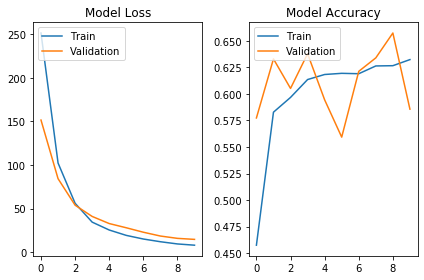

2560/2560 [==============================] - 0s 8us/step

Accurancy: 0.5949


In [27]:
num_epochs = 10

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(3, activation='softmax')(x)

model = w(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)



# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/Linear-Token-{:.3f}.h5'.format((scores[1] * 100)))

## Linear - Morph

Train on 8195 samples, validate on 2049 samples
Epoch 1/10
8195/8195 [==============================] - 0s 27us/step - loss: 263.1366 - accuracy: 0.4758 - val_loss: 178.0403 - val_accuracy: 0.5368
Epoch 2/10
8195/8195 [==============================] - 0s 19us/step - loss: 129.3045 - accuracy: 0.5562 - val_loss: 90.2597 - val_accuracy: 0.5954
Epoch 3/10
8195/8195 [==============================] - 0s 19us/step - loss: 67.1848 - accuracy: 0.5911 - val_loss: 55.0518 - val_accuracy: 0.6218
Epoch 4/10
8195/8195 [==============================] - 0s 20us/step - loss: 40.4901 - accuracy: 0.6116 - val_loss: 38.0319 - val_accuracy: 0.6545
Epoch 5/10
8195/8195 [==============================] - 0s 25us/step - loss: 28.2066 - accuracy: 0.6081 - val_loss: 28.9853 - val_accuracy: 0.6286
Epoch 6/10
8195/8195 [==============================] - 0s 20us/step - loss: 20.8932 - accuracy: 0.6171 - val_loss: 23.6331 - val_accuracy: 0.6291
Epoch 7/10
8195/8195 [==============================] - 0s 19us/ste

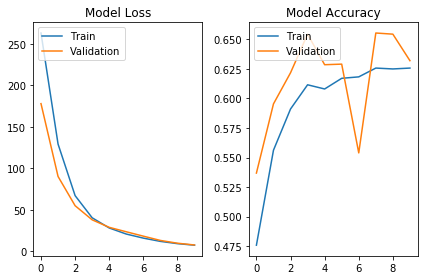

2560/2560 [==============================] - 0s 8us/step

Accurancy: 0.6262


In [28]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/Linear-Morph-{:.3f}.h5'.format((scores[1] * 100)))

## CNN - Token

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8195 samples, validate on 2049 samples
Epoch 1/5
8195/8195 [==============================] - 32s 4ms/step - loss: 0.6985 - accuracy: 0.7049 - val_loss: 0.6520 - val_accuracy: 0.7243
Epoch 2/5
8195/8195 [==============================] - 35s 4ms/step - loss: 0.5807 - accuracy: 0.7789 - val_loss: 0.5085 - val_accuracy: 0.8014
Epoch 3/5
8195/8195 [==============================] - 34s 4ms/step - loss: 0.4103 - accuracy: 0.8581 - val_loss: 0.4032 - val_accuracy: 0.8614
Epoch 4/5
8195/8195 [==============================] - 32s 4ms/step - loss: 0.3025 - accuracy: 0.9008 - val_loss: 0.3603 - val_accuracy: 0.873129 - accuracy: 0.
Epoch 5/5
8195/8195 [==============================] - 34s 4ms/step - loss: 0.2291 - accuracy: 0.9279 - val_loss: 0.3504 - val_accuracy: 0.8848


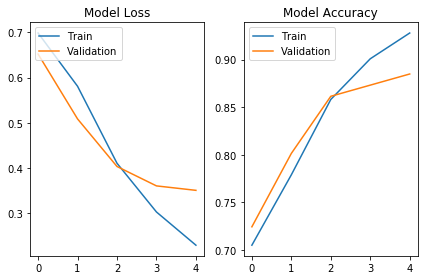

2560/2560 [==============================] - 2s 697us/step

Accurancy: 0.892


In [29]:
num_epochs = 5

# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                        batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/CNN-Token-{:.3f}.h5'.format((scores[1] * 100)))


## CNN - Morph

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8195 samples, validate on 2049 samples
Epoch 1/5
8195/8195 [==============================] - 32s 4ms/step - loss: 0.6945 - accuracy: 0.7014 - val_loss: 0.6579 - val_accuracy: 0.7218
Epoch 2/5
8195/8195 [==============================] - 33s 4ms/step - loss: 0.5838 - accuracy: 0.7736 - val_loss: 0.5021 - val_accuracy: 0.8194
Epoch 3/5
8195/8195 [==============================] - 32s 4ms/step - loss: 0.4108 - accuracy: 0.8585 - val_loss: 0.4066 - val_accuracy: 0.8511
Epoch 4/5
8195/8195 [==============================] - 31s 4ms/step - loss: 0.3060 - accuracy: 0.8969 - val_loss: 0.3591 - val_accuracy: 0.8755
Epoch 5/5
8195/8195 [==============================] - 32s 4ms/step - loss: 0.2342 - accuracy: 0.9252 - val_loss: 0.3432 - val_accuracy: 0.8897


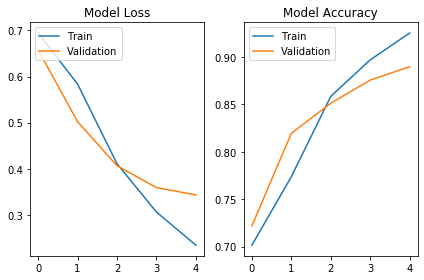

2560/2560 [==============================] - 2s 619us/step

Accurancy: 0.8984


In [30]:
# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/CNN-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [110]:
x_morph_train

array([[180, 159, 274, ...,   0,   0,   0],
       [ 70,  65,  13, ...,   0,   0,   0],
       [ 14,   1,  22, ...,   0,   0,   0],
       ...,
       [  7,  17, 293, ...,   0,   0,   0],
       [259, 132,   1, ...,   0,   0,   0],
       [  7, 121, 208, ...,   0,   0,   0]])

In [111]:
test=x_morph_train[:5]

In [39]:
# test model tahles
from keras.models import load_model

model = load_model('word_saved_models/CNN-Morph-89.844.h5')
#predictions = model.predict(input)

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [141]:
model.predict(test)[4]

array([0.99268687, 0.00536686, 0.0019463 ], dtype=float32)

## LSTM - Token

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8195 samples, validate on 2049 samples
Epoch 1/7
8195/8195 [==============================] - 44s 5ms/step - loss: 0.8151 - accuracy: 0.6510 - val_loss: 0.7440 - val_accuracy: 0.6593
Epoch 2/7
8195/8195 [==============================] - 43s 5ms/step - loss: 0.7469 - accuracy: 0.6641 - val_loss: 0.7411 - val_accuracy: 0.6593
Epoch 3/7
8195/8195 [==============================] - 42s 5ms/step - loss: 0.7400 - accuracy: 0.6697 - val_loss: 0.7384 - val_accuracy: 0.6637
Epoch 4/7
8195/8195 [==============================] - 42s 5ms/step - loss: 0.7377 - accuracy: 0.6730 - val_loss: 0.7437 - val_accuracy: 0.6740
Epoch 5/7
8195/8195 [==============================] - 41s 5ms/step - loss: 0.6903 - accuracy: 0.7062 - val_loss: 0.5975 - val_accuracy: 0.7150
Epoch 6/7
8195/8195 [==============================] - 42s 5ms/step - loss: 0.4775 - accuracy: 0.8375 - val_loss: 0.4704 - val_accuracy: 0.8463
Epoch 7/7
8195/8195 [==============================] - 41s 5ms/step - loss: 0.3645 - acc

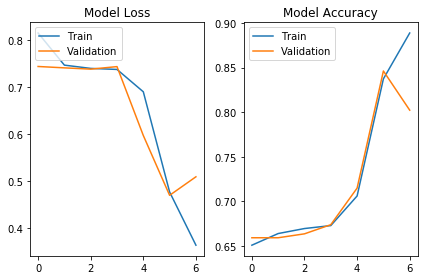

2560/2560 [==============================] - 3s 1ms/step

Accurancy: 0.806


In [31]:
num_epochs = 7
lstm_units = 93

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/LSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))


## LSTM - Morph

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8195 samples, validate on 2049 samples
Epoch 1/7
8195/8195 [==============================] - 45s 5ms/step - loss: 0.8131 - accuracy: 0.6622 - val_loss: 0.7407 - val_accuracy: 0.6593
Epoch 2/7
8195/8195 [==============================] - 45s 5ms/step - loss: 0.7363 - accuracy: 0.6777 - val_loss: 0.7323 - val_accuracy: 0.6891
Epoch 3/7
8195/8195 [==============================] - 43s 5ms/step - loss: 0.7219 - accuracy: 0.6935 - val_loss: 0.7173 - val_accuracy: 0.6955
Epoch 4/7
8195/8195 [==============================] - 43s 5ms/step - loss: 0.6297 - accuracy: 0.7458 - val_loss: 0.6123 - val_accuracy: 0.7228
Epoch 5/7
8195/8195 [==============================] - 41s 5ms/step - loss: 0.5107 - accuracy: 0.8395 - val_loss: 0.5152 - val_accuracy: 0.8277
Epoch 6/7
8195/8195 [==============================] - 42s 5ms/step - loss: 0.5137 - accuracy: 0.8432 - val_loss: 0.5474 - val_accuracy: 0.8238
Epoch 7/7
8195/8195 [==============================] - 43s 5ms/step - loss: 0.6041 - acc

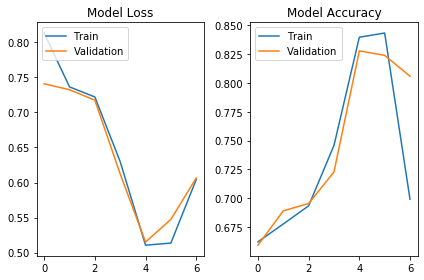

2560/2560 [==============================] - 3s 1ms/step

Accurancy: 0.807


In [32]:
num_epochs = 7

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/LSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

## BiLSTM - Token

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8195 samples, validate on 2049 samples
Epoch 1/3
8195/8195 [==============================] - 82s 10ms/step - loss: 0.7429 - accuracy: 0.6932 - val_loss: 0.6532 - val_accuracy: 0.7374
Epoch 2/3
8195/8195 [==============================] - 86s 10ms/step - loss: 0.5112 - accuracy: 0.8133 - val_loss: 0.4328 - val_accuracy: 0.8477
Epoch 3/3
8195/8195 [==============================] - 78s 10ms/step - loss: 0.3371 - accuracy: 0.8908 - val_loss: 0.3909 - val_accuracy: 0.8677


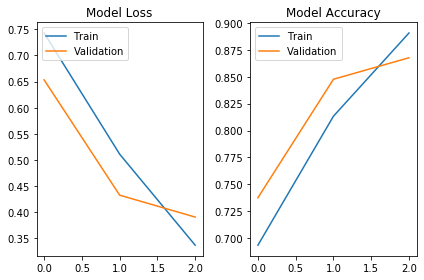

2560/2560 [==============================] - 6s 2ms/step

Accurancy: 0.875


In [33]:
num_epochs = 3

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/BiLSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))

## BiLSTM - Morph

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8195 samples, validate on 2049 samples
Epoch 1/3
8195/8195 [==============================] - 80s 10ms/step - loss: 0.7507 - accuracy: 0.6713 - val_loss: 0.6610 - val_accuracy: 0.6935
Epoch 2/3
8195/8195 [==============================] - 79s 10ms/step - loss: 0.5358 - accuracy: 0.7879 - val_loss: 0.4608 - val_accuracy: 0.8282
Epoch 3/3
8195/8195 [==============================] - 78s 10ms/step - loss: 0.3608 - accuracy: 0.8775 - val_loss: 0.3892 - val_accuracy: 0.8629


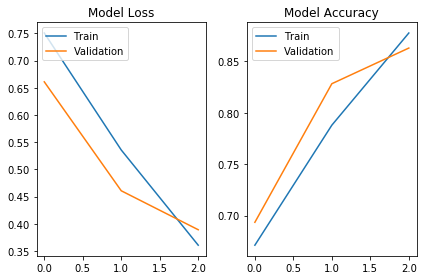

2560/2560 [==============================] - 5s 2ms/step

Accurancy: 0.870


In [34]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/BiLSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

## MLP - Token

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8195 samples, validate on 2049 samples
Epoch 1/6
8195/8195 [==============================] - 29s 4ms/step - loss: 0.8489 - accuracy: 0.6040 - val_loss: 0.7165 - val_accuracy: 0.6764
Epoch 2/6
8195/8195 [==============================] - 28s 3ms/step - loss: 0.7587 - accuracy: 0.6650 - val_loss: 0.6863 - val_accuracy: 0.7111
Epoch 3/6
8195/8195 [==============================] - 27s 3ms/step - loss: 0.7113 - accuracy: 0.7031 - val_loss: 0.6530 - val_accuracy: 0.7282
Epoch 4/6
8195/8195 [==============================] - 27s 3ms/step - loss: 0.6514 - accuracy: 0.7373 - val_loss: 0.5745 - val_accuracy: 0.7779
Epoch 5/6
8195/8195 [==============================] - 28s 3ms/step - loss: 0.5341 - accuracy: 0.8007 - val_loss: 0.4593 - val_accuracy: 0.8302
Epoch 6/6
8195/8195 [==============================] - 28s 3ms/step - loss: 0.4103 - accuracy: 0.8586 - val_loss: 0.3864 - val_accuracy: 0.8536


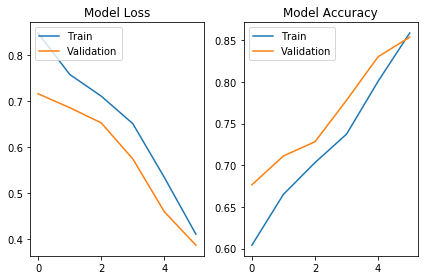

2560/2560 [==============================] - 1s 206us/step

Accurancy: 0.858


In [35]:
num_epochs = 6

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/MLP-Token-{:.3f}.h5'.format((scores[1] * 100)))

## MLP - Morph

C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8195 samples, validate on 2049 samples
Epoch 1/6
8195/8195 [==============================] - 28s 3ms/step - loss: 0.8245 - accuracy: 0.6279 - val_loss: 0.7075 - val_accuracy: 0.7091
Epoch 2/6
8195/8195 [==============================] - 29s 4ms/step - loss: 0.7362 - accuracy: 0.6787 - val_loss: 0.6719 - val_accuracy: 0.7135
Epoch 3/6
8195/8195 [==============================] - 31s 4ms/step - loss: 0.6996 - accuracy: 0.7014 - val_loss: 0.6538 - val_accuracy: 0.7282
Epoch 4/6
8195/8195 [==============================] - 28s 3ms/step - loss: 0.6347 - accuracy: 0.7342 - val_loss: 0.5642 - val_accuracy: 0.7775
Epoch 5/6
8195/8195 [==============================] - 29s 4ms/step - loss: 0.5071 - accuracy: 0.8079 - val_loss: 0.4390 - val_accuracy: 0.8287
Epoch 6/6
8195/8195 [==============================] - 28s 3ms/step - loss: 0.3649 - accuracy: 0.8749 - val_loss: 0.3862 - val_accuracy: 0.850257 - accuracy: 0.


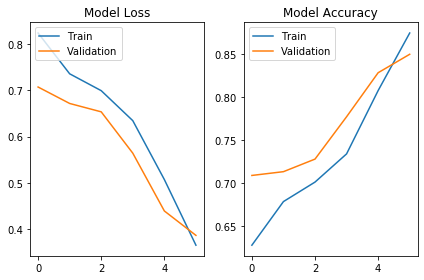

2560/2560 [==============================] - 1s 208us/step

Accurancy: 0.856


In [36]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/MLP-Morph-{:.3f}.h5'.format((scores[1] * 100)))